1. A company specializes in spherical segments and wants to automate the calculation of the lateral surface area,
total surface area, and volume. Implement these calculations in Python using a class. The formulas are given as:

You should define a class that contains methods for each of the calculations (lateral surface area, total surface
area, and volume). For the calculation, a variable is required for storing the result, as well as separate variables
for the radius and the height. What is the result for the following values? Print the results using a print()
statemet.

In [2]:
import math

class SphericalSegment:
    def __init__(self, r, h):
        self.r = r  # Radius of the base of the spherical segment
        self.h = h  # Height of the spherical segment

    def lateral_surface_area(self):
        R = self.h * (2 * self.r - self.h) # Formula: LSA = π * R * r where R = h(2r - h)
        return math.pi * R * self.r    #  R = math.sqrt(h * (2 * r - h))

    def total_surface_area(self):
        R = self.h * (2 * self.r - self.h)   # Formula: TSA = π * r * (2h + h(2r - h))
        return math.pi * self.r * (2 * self.h + R)

    def volume(self):
        # Formula: V = (2/3) * π * r^2 * h
        return (2 / 3) * math.pi * self.r**2 * self.h
        
r = 4.0  # Radius of the spherical segment
h = 2.0  # Height of the spherical segment

segment = SphericalSegment(r, h)
lateral_surface_area = segment.lateral_surface_area()
total_surface_area = segment.total_surface_area()
volume = segment.volume()

print(f"Lateral Surface Area: {lateral_surface_area:.2f}")
print(f"Total Surface Area: {total_surface_area:.2f}")
print(f"Volume: {volume:.2f}")

Lateral Surface Area: 150.80
Total Surface Area: 201.06
Volume: 67.02


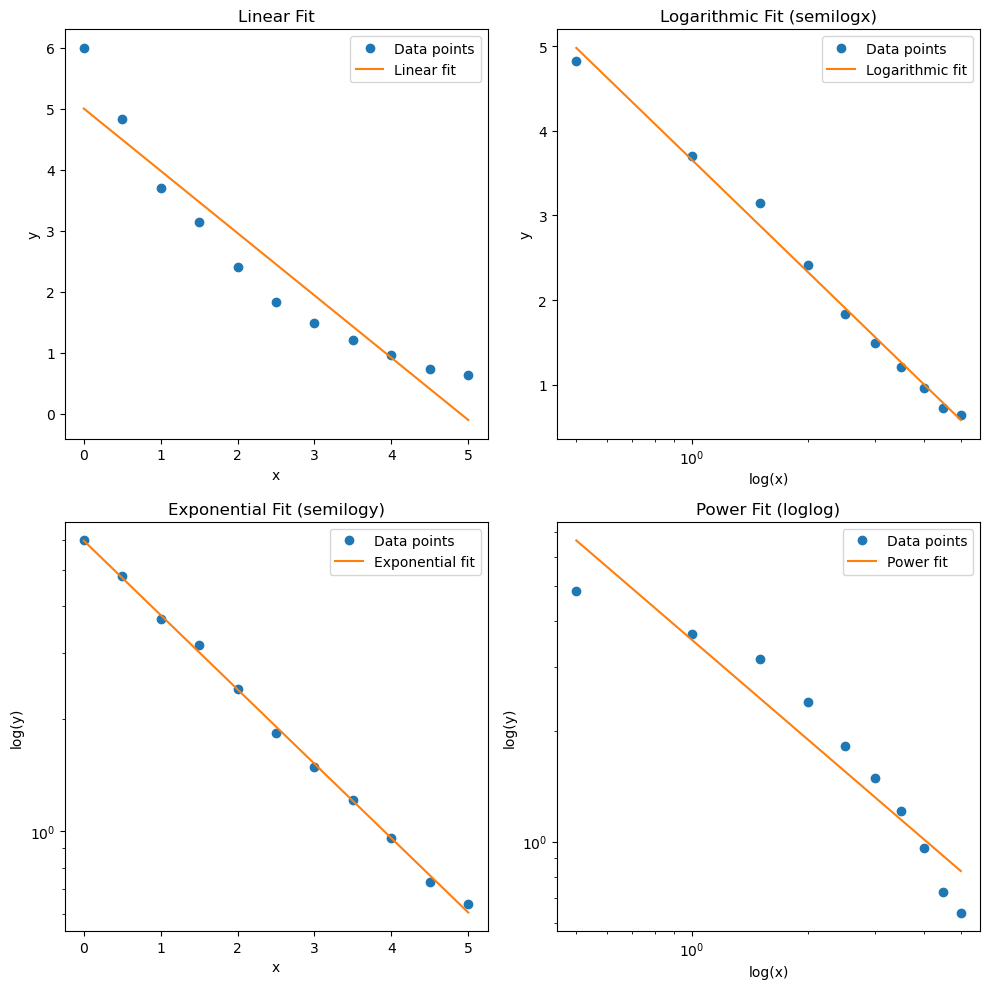

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.array([6.0, 4.83, 3.7, 3.15, 2.41, 1.83, 1.49, 1.21, 0.96, 0.73, 0.64])

# 1. Linear Fit: y = mx + b
linear_fit = np.polyfit(x, y, 1)
linear_fit_fn = np.poly1d(linear_fit)

# 2. Power Fit: y = bx^m (log transformation to make it linear)
log_x = np.log(x[1:])  # Exclude x=0 for logarithmic transformations
log_y = np.log(y[1:])
power_fit = np.polyfit(log_x, log_y, 1)
power_fit_fn = lambda x: np.exp(power_fit[1]) * x**power_fit[0]

# 3. Exponential Fit: y = be^(mx) (log transformation to make it linear in y)
exp_fit = np.polyfit(x, np.log(y), 1)
exp_fit_fn = lambda x: np.exp(exp_fit[1]) * np.exp(exp_fit[0] * x)

# 4. Logarithmic Fit: y = m log(x) + b (only applies for x > 0)
logarithmic_fit = np.polyfit(np.log(x[1:]), y[1:], 1)
logarithmic_fit_fn = lambda x: logarithmic_fit[0] * np.log(x) + logarithmic_fit[1]

# 5. Reciprocal Fit: y = 1 / (mx + b)
reciprocal_fit = np.polyfit(x, 1/y, 1)
reciprocal_fit_fn = lambda x: 1 / (reciprocal_fit[0] * x + reciprocal_fit[1])

# Plotting the results
plt.figure(figsize=(10, 10))

# Subplot 1: Regular plot (Linear)
plt.subplot(2, 2, 1)
plt.plot(x, y, 'o', label='Data points')
plt.plot(x, linear_fit_fn(x), '-', label='Linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')
plt.legend()

# Subplot 2: semilogx (Logarithmic x-axis)
plt.subplot(2, 2, 2)
plt.semilogx(x[1:], y[1:], 'o', label='Data points')
plt.semilogx(x[1:], logarithmic_fit_fn(x[1:]), '-', label='Logarithmic fit')
plt.xlabel('log(x)')
plt.ylabel('y')
plt.title('Logarithmic Fit (semilogx)')
plt.legend()

# Subplot 3: semilogy (Logarithmic y-axis)
plt.subplot(2, 2, 3)
plt.semilogy(x, y, 'o', label='Data points')
plt.semilogy(x, exp_fit_fn(x), '-', label='Exponential fit')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.title('Exponential Fit (semilogy)')
plt.legend()

# Subplot 4: loglog (Logarithmic both axes)
plt.subplot(2, 2, 4)
plt.loglog(x[1:], y[1:], 'o', label='Data points')
plt.loglog(x[1:], power_fit_fn(x[1:]), '-', label='Power fit')
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Power Fit (loglog)')
plt.legend()

plt.tight_layout()
plt.show()


In [62]:
linear_fit

array([-1.02218182,  5.00545455])

### In class exercise using assingment (curve_fit) 

Fitted parameters: a = 6.019578891017493, b = -0.46026480297754097


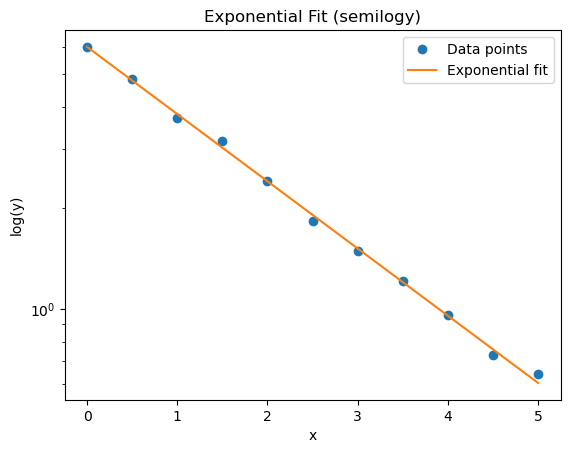

In [10]:
# 3. Exponential Fit: y = be^(mx) (log transformation to make it linear in y)
#exp_fit = np.polyfit(x, np.log(y), 1)
#exp_fit_fn = lambda x: np.exp(exp_fit[1]) * np.exp(exp_fit[0] * x)


from scipy.optimize import curve_fit

#Creating the exponential function
def exponential_func(x, b, m):
    return b * np.exp(m * x)

X = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.array([6.0, 4.83, 3.7, 3.15, 2.41, 1.83, 1.49, 1.21, 0.96, 0.73, 0.64])
#Using the curve_fit module, we can fit into our model and extract the parameters
pop, pco = curve_fit(exponential_func, X, y)

b, m = pop
print(f"Fitted parameters: a = {b}, b = {m}")

# Plot the original data
plt.plot(X, y, 'o', label='Data points')
plt.semilogy(X, exponential_func(X, *pop), '-', label='Exponential fit')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.title('Exponential Fit (semilogy)')
plt.legend()


In [68]:
x_train
log_x_train

array([[-0.69314718],
       [ 0.87546874],
       [ 1.16315081],
       [ 1.58923521],
       [ 1.87180218],
       [ 2.05412373],
       [ 2.20827441],
       [ 2.3321439 ]])

In [69]:
 = np.log(x_train).reshape(8, 1)
log_x_train1

array([[-0.69314718],
       [ 0.87546874],
       [ 1.16315081],
       [ 1.58923521],
       [ 1.87180218],
       [ 2.05412373],
       [ 2.20827441],
       [ 2.3321439 ]])

Slope (m): 2.1017754670557154
Intercept (b): 2.7202902474268877
Training Metrics:
 - RMSE: 23.68
 - MAE: 15.89
 - MSE: 560.89
Test Metrics:
 - RMSE: 38.33
 - MAE: 27.27
 - MSE: 1469.44


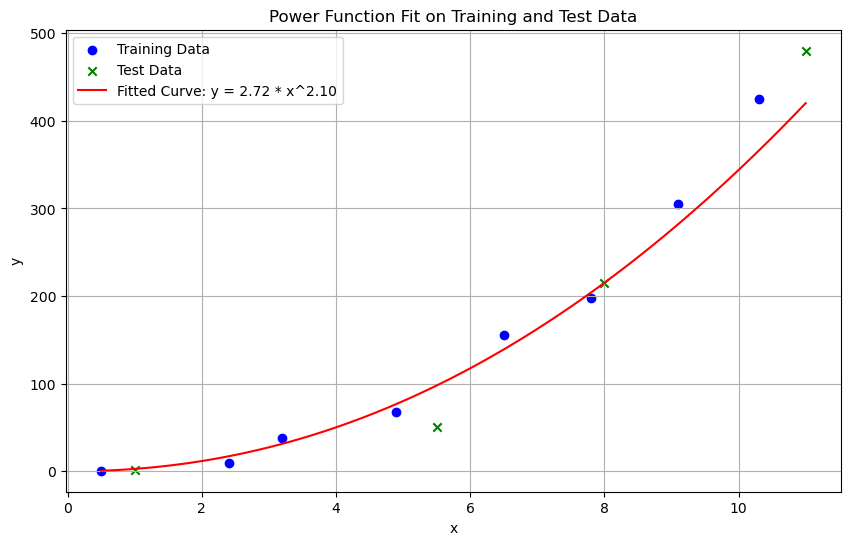

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Given training data (x, y) and test data
x_train = np.array([0.5, 2.4, 3.2, 4.9, 6.5, 7.8, 9.1, 10.3])
y_train = np.array([0.8, 9.3, 37.9, 68.2, 155, 198, 305, 425])

x_test = np.array([1.0, 5.5, 8.0, 11.0])
y_test = np.array([1.5, 50, 215, 480])

# Step a: Convert the data to logarithmic scale
log_x_train1 = np.log(x_train).reshape(-1, 1)
log_y_train = np.log(y_train)

log_x_test = np.log(x_test).reshape(-1, 1)
log_y_test = np.log(y_test)

# Step b: Fit a linear regression model on the log-transformed training data
model = LinearRegression()
model.fit(log_x_train1, log_y_train)

# Step c: Extract the slope (m) and intercept (log_b) from the model
slope = model.coef_[0]
log_intercept = model.intercept_

# Step d: Convert the intercept back to its original scale to get coefficient b
intercept = np.exp(log_intercept)

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# The power law model is y = b * x^m

# Step e: Predict on both the training and test data using the fitted model
# Convert back from log scale to original scale
y_train_pred = intercept * x_train ** slope
y_test_pred = intercept * x_test ** slope

# Compute RMSE, MAE, and MSE for both training and test data
def calculate_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    return mse, rmse, mae

train_mse, train_rmse, train_mae = calculate_metrics(y_train, y_train_pred)
test_mse, test_rmse, test_mae = calculate_metrics(y_test, y_test_pred)

print(f"Training Metrics:")
print(f" - RMSE: {train_rmse:.2f}")
print(f" - MAE: {train_mae:.2f}")
print(f" - MSE: {train_mse:.2f}")

print(f"Test Metrics:")
print(f" - RMSE: {test_rmse:.2f}")
print(f" - MAE: {test_mae:.2f}")
print(f" - MSE: {test_mse:.2f}")

# Step f: Plot the data points and the fitted power law curve
plt.figure(figsize=(10, 6))

# Plot the original training and test data points
plt.scatter(x_train, y_train, color='blue', label='Training Data', marker='o')
plt.scatter(x_test, y_test, color='green', label='Test Data', marker='x')

# Plot the fitted curve
x_range = np.linspace(0.5, 11, 100)
y_fitted = intercept * x_range ** slope
plt.plot(x_range, y_fitted, color='red', label=f'Fitted Curve: y = {intercept:.2f} * x^{slope:.2f}')

# Formatting the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power Function Fit on Training and Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
x_train = np.array([0.5, 2.4, 3.2, 4.9, 6.5, 7.8, 9.1, 10.3])
y_train = np.array([0.8, 9.3, 37.9, 68.2, 155, 198, 305, 425])

In [15]:
# Step a: Convert the data to logarithmic scale
log_x_train = np.log(x_train).reshape(-1, 1)
log_x_train

array([[-0.69314718],
       [ 0.87546874],
       [ 1.16315081],
       [ 1.58923521],
       [ 1.87180218],
       [ 2.05412373],
       [ 2.20827441],
       [ 2.3321439 ]])

In [23]:
model.coef_

array([2.10177547])

In [24]:
model.coef_[0]

2.1017754670557154

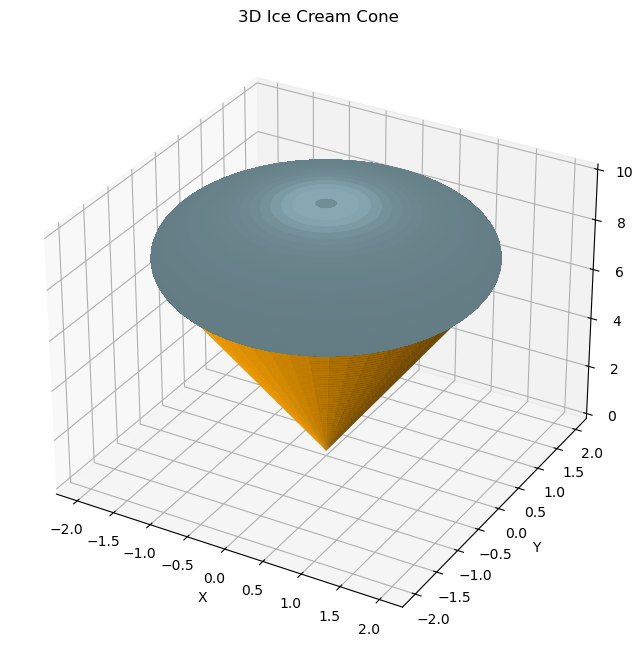

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111, projection='3d')

fig, ax = plt.subplots(1,1,subplot_kw={'projection': '3d'}, figsize=(18, 8))

# Parameters for the cone and hemisphere
theta = np.linspace(0, 2 * np.pi, 50)
r_cone = np.linspace(0, 2, 50)
theta, r_cone = np.meshgrid(theta, r_cone)

# Parametric equations for the cone (base diameter = 4 inches, height = 8 inches)
x_cone = r_cone * np.cos(theta)
y_cone = r_cone * np.sin(theta)
z_cone = 4 * r_cone  # The height of the cone is z = 4r

# Plot the cone
ax.plot_surface(x_cone, y_cone, z_cone, color='orange')

# Parameters for the hemisphere (diameter = 4 inches)
phi = np.linspace(0, np.pi, 50)
theta, phi = np.meshgrid(theta, phi)
r_hemisphere = 2  # Radius of the hemisphere

# Parametric equations for the hemisphere (top)
x_hemisphere = r_hemisphere * np.cos(theta) * np.sin(phi)
y_hemisphere = r_hemisphere * np.sin(theta) * np.sin(phi)
z_hemisphere = 8 + r_hemisphere * np.cos(phi)

# Plot the hemisphere
ax.plot_surface(x_hemisphere, y_hemisphere, z_hemisphere, color='lightblue')

# Plot formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Ice Cream Cone')

# Adjust the viewing angle for better visualization
#ax.view_init(elev=30, azim=200)

plt.show()


(<Figure size 1800x800 with 3 Axes>,
 array([<Axes3D: >, <Axes3D: >, <Axes3D: >], dtype=object))

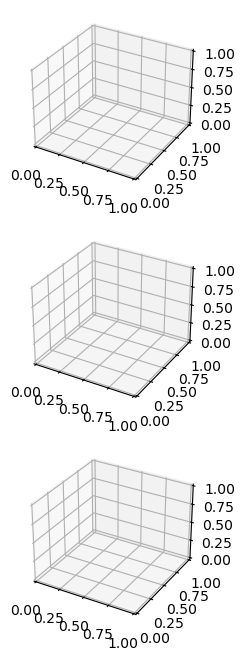

In [37]:
fig, axes = plt.subplots(3,1,subplot_kw={'projection': '3d'}, figsize=(18, 8))
fig,axes

In [42]:
with open("random_text.txt","r") as f:
    for line in f:
        print(line)

Harry James Potter was an English half-blood wizard, and one of the most famous wizards of modern times. The only child and son of James and Lily Potter (nÃ©e Evans), Harry's birth was overshadowed by a prophecy, naming either himself or Neville Longbottom as the one with the power to vanquish Lord Voldemort, the most powerful and feared Dark Wizard in the world. After half of the prophecy was reported to Voldemort, courtesy of Severus Snape, Harry was chosen as the target due to his many similarities with the Dark Lord. In turn, this caused the Potter family to go into hiding.



Voldemort made his first attempt to circumvent the prophecy when Harry was a year and three months old. During this attempt, he murdered Harry's parents as they tried to protect him, but this unsuccessful attempt to kill Harry led to Voldemort's first downfall. This downfall marked the end of the First Wizarding War, and to Harry henceforth being known as "The Boy Who Lived", as he was the only known survivor

In [45]:
with open("random_text.txt","r") as f:
    for line in f:
        words=line.split(' ')
        for x in words:
          print(x)

Harry
James
Potter
was
an
English
half-blood
wizard,
and
one
of
the
most
famous
wizards
of
modern
times.
The
only
child
and
son
of
James
and
Lily
Potter
(nÃ©e
Evans),
Harry's
birth
was
overshadowed
by
a
prophecy,
naming
either
himself
or
Neville
Longbottom
as
the
one
with
the
power
to
vanquish
Lord
Voldemort,
the
most
powerful
and
feared
Dark
Wizard
in
the
world.
After
half
of
the
prophecy
was
reported
to
Voldemort,
courtesy
of
Severus
Snape,
Harry
was
chosen
as
the
target
due
to
his
many
similarities
with
the
Dark
Lord.
In
turn,
this
caused
the
Potter
family
to
go
into
hiding.



Voldemort
made
his
first
attempt
to
circumvent
the
prophecy
when
Harry
was
a
year
and
three
months
old.
During
this
attempt,
he
murdered
Harry's
parents
as
they
tried
to
protect
him,
but
this
unsuccessful
attempt
to
kill
Harry
led
to
Voldemort's
first
downfall.
This
downfall
marked
the
end
of
the
First
Wizarding
War,
and
to
Harry
henceforth
being
known
as
"The
Boy
Who
Lived",
as
he
was
the
only
known
survivor

In [50]:
word_stats = {}

with open("random_text.txt","r") as f:
    for line in f:
        words=line.split(' ')
        for x in words:
            if x in word_stats:
                word_stats[x]+=1
            else:
                word_stats[x] = 1
                
print(word_stats)

{'Harry': 26, 'James': 3, 'Potter': 3, 'was': 18, 'an': 4, 'English': 1, 'half-blood': 1, 'wizard,': 1, 'and': 35, 'one': 2, 'of': 43, 'the': 69, 'most': 2, 'famous': 1, 'wizards': 1, 'modern': 1, 'times.': 1, 'The': 4, 'only': 7, 'child': 1, 'son': 2, 'Lily': 2, '(nÃ©e': 1, 'Evans),': 1, "Harry's": 4, 'birth': 1, 'overshadowed': 1, 'by': 4, 'a': 8, 'prophecy,': 2, 'naming': 1, 'either': 2, 'himself': 1, 'or': 3, 'Neville': 1, 'Longbottom': 1, 'as': 7, 'with': 6, 'power': 1, 'to': 33, 'vanquish': 1, 'Lord': 3, 'Voldemort,': 3, 'powerful': 2, 'feared': 1, 'Dark': 7, 'Wizard': 1, 'in': 16, 'world.': 1, 'After': 3, 'half': 1, 'prophecy': 3, 'reported': 1, 'courtesy': 1, 'Severus': 2, 'Snape,': 1, 'chosen': 1, 'target': 1, 'due': 3, 'his': 19, 'many': 3, 'similarities': 1, 'Lord.': 2, 'In': 4, 'turn,': 1, 'this': 5, 'caused': 1, 'family': 2, 'go': 1, 'into': 2, 'hiding.\n': 1, '\n': 7, 'Voldemort': 5, 'made': 2, 'first': 4, 'attempt': 3, 'circumvent': 1, 'when': 2, 'year': 2, 'three': 3, '

In [57]:
sorted_dict = dict(sorted(word_stats.items()))
sorted_dict

{'\n': 7,
 '"Teddy"': 1,
 '"The': 1,
 '"move': 1,
 '"not': 1,
 '&': 1,
 '(i.e.,': 1,
 '(nÃ©e': 1,
 '1991.': 1,
 '2007,': 1,
 '2020.\n': 1,
 '26,': 1,
 '4': 1,
 'After': 3,
 'Against': 4,
 'Albus': 2,
 'All': 1,
 'Alley,': 1,
 'Alley.': 1,
 'Apothecary).': 1,
 'Army.': 1,
 'Arts': 3,
 'Arts.\n': 1,
 'At': 2,
 'Auror': 2,
 'Bank,': 1,
 'Battle': 2,
 'Black,': 1,
 'Blood': 1,
 'Blotts,': 1,
 'Bond': 1,
 'Boy': 1,
 'Cedric': 1,
 'Chamber': 1,
 'Colin': 1,
 'Creevey,': 1,
 'Cups.': 1,
 'Curse': 1,
 'Dark': 7,
 'Death,': 1,
 'Deathly': 1,
 'Decree,': 1,
 'Defence': 4,
 'Department': 2,
 'Diagon': 2,
 'Diggory': 1,
 'Dolores': 1,
 'Drive': 1,
 'Due': 1,
 'Dumbledore': 2,
 "Dumbledore's": 1,
 'During': 3,
 'Dursley': 2,
 'Dursley,': 1,
 'Dursley.': 1,
 'Educational': 1,
 'Edward': 1,
 'Enforcement': 1,
 'English': 1,
 'Evans),': 1,
 'First': 1,
 'Flourish': 1,
 'Fred': 1,
 'Ginny': 1,
 'Ginny,': 1,
 'Granger': 1,
 'Granger.': 1,
 'Gringotts': 1,
 'Gryffindor': 2,
 "Gryffindor's": 1,
 'Hagrid':

In [59]:
sorted_dict = dict(sorted(word_stats.items(), reverse=True,key=lambda items: items[1])[:5])
sorted_dict

{'the': 69, 'of': 43, 'and': 35, 'to': 33, 'Harry': 26}